## Import all the required libraries

In [24]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [25]:
#From NLTK we will use NLTK libraries for that we will require stopwords and punkt

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
#import Amazon dataset
data = pd.read_csv('Amazoneviews.csv')
data.head()

Review  Sentiment
0  Fast shipping but this product is very cheaply...          1
1  This case takes so long to ship and it's not e...          1
2  Good for not droids. Not good for iPhones. You...          1
3  The cable was not compatible between my macboo...          1
4  The case is nice but did not have a glow light...          1

## Preprocessing and cleaning

In [27]:
data. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [28]:
#Lets drop null values
data.dropna(inplace=True)

In [29]:
#To predict sentiment as being positive or negative

#1,2,3 -> negative (i.e 0)
data.loc[data['Sentiment']<=3,'Sentiment'] = 0
#4,5 -> positive (i.e 1)
data.loc[data['Sentiment']>3,'Sentiment'] = 1


In [30]:
#Now lets clean the stopwords
stp_words = stopwords.words('english')
def clean_review(review):
    cleanreview="".join(word for word in review.split() if word not in stp_words)
    return cleanreview

    data['Review']=data['Review'].apply(clean_review)


In [31]:
data.head()

Review  Sentiment
0  Fast shipping but this product is very cheaply...          0
1  This case takes so long to ship and it's not e...          0
2  Good for not droids. Not good for iPhones. You...          0
3  The cable was not compatible between my macboo...          0
4  The case is nice but did not have a glow light...          0

## Analysis of dataset

In [33]:
data["Sentiment"].value_counts()

Sentiment
0    15000
1     9999
Name: count, dtype: int64

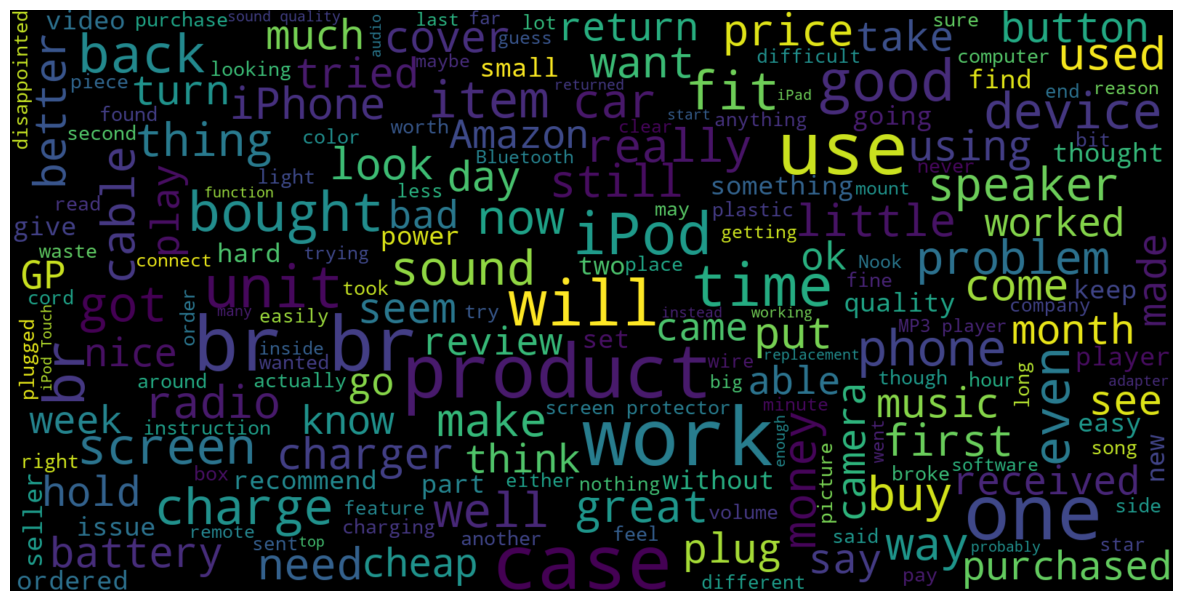

In [34]:
# Wordscloud for all the words with sentiment = 0

consolidated=' '.join(word for word in data['Review'][data['Sentiment']==0].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

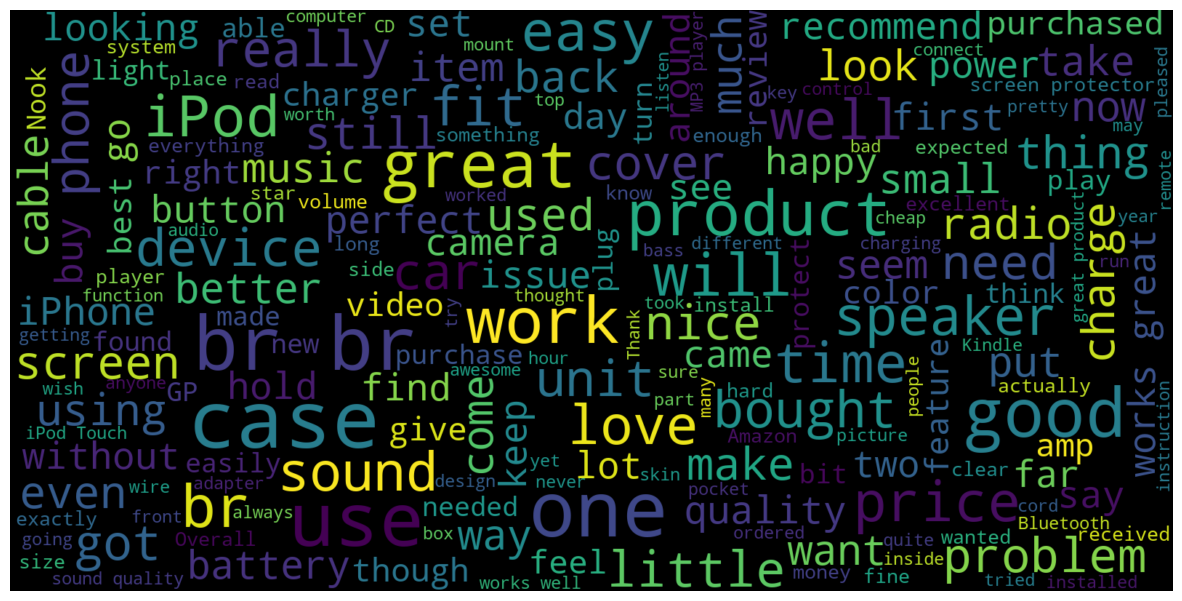

In [36]:
# Wordscloud for all the words with sentiment = 1
consolidated=' '.join(word for word in data['Review'][data['Sentiment']==1].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()


## Converting words into vectors

In [37]:
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(data['Review'] ).toarray()

## Model evaluation and predition

In [39]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test=train_test_split(X,data['Sentiment'],
                                                test_size=0.25 ,
                                                random_state = 42)
                

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model=LogisticRegression()

#Model fitting
model.fit(x_train,y_train)

#testing the model
pred=model.predict(x_test)

#model accuracy
print(accuracy_score(y_test,pred))

0.83104


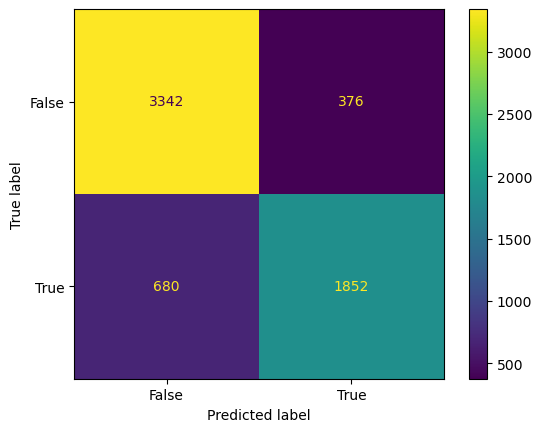

In [42]:
#confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, 
                                            display_labels = [False, True])

cm_display.plot()
plt.show()
